# Example Uses

Examples off how to use this. Also, a way for me to figure out what functionality I need to add in.

Do download CoverageTrends to parent directory; at some point I'll add the download dataset options

In [ ]:
# !git clone https://github.com/brockmanmatt/CoverageTrends.git ..

pointer to where coverage trends is

In [ ]:
!pip install --upgrade newstrends 

  Found existing installation: newstrends 0.0.10
    Uninstalling newstrends-0.0.10:
      Successfully uninstalled newstrends-0.0.10


In [ ]:
ctd = CoverageTrendsDir = "../CoverageTrends"

In [ ]:
from newstrends import describe
import pandas as pd
import matplotlib.pyplot as plt
import os, pickle

## I load all the articles into a describer

In [ ]:
holder = describe.describer()
holder.set_articleDir(path="../CoverageTrends")
holder.load_articles()

How many headlines are we looking at?

In [ ]:
len(holder.df)

2262462

How many of them are unique?

In [ ]:
holder.df.quickReplace.nunique()

91453

How many time stamps are there per day? Should be 48 pulling every 30 minutes but I broke the scraper a few times early on, but now it should be working fine

In [ ]:
holder.df.date = pd.to_datetime(holder.df.date)

In [ ]:
tmp = holder.df.date.unique()
tmp = pd.DataFrame(tmp)
tmp.set_index(0, inplace=True, drop=True)
tmp["count"] = 1

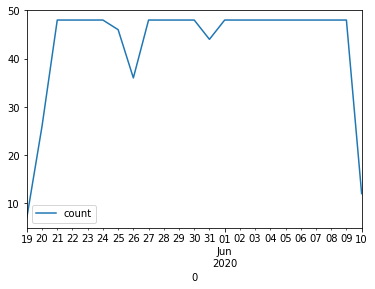

In [ ]:
tmp.resample("d").count().plot()

What are my publishers?

In [ ]:
holder.df.source.unique()

array(['yahoonews', 'businessinsider', 'nbcnews', 'politico', 'reuters',
       'abcnews', 'cnbc', 'dailybeast', 'bbc', 'foxnews', 'breitbart',
       'cnn', 'bostonglobe', 'chicagotribune', 'nypost', 'washingtonpost',
       'sanfransiscochronicle', 'aljazeera', 'nationalreview', 'rt',
       'nydailynews', 'newyorktimes', 'axios', 'livescience', 'forbes',
       'fortune', 'arstechnica', 'dailycaller', 'npr', 'slate', 'sputnik',
       'buzzfeed', 'techcrunch', 'newyorker', 'theatlantic'], dtype=object)

### We can just use pickle to save these for later use as well

In [ ]:
os.makedirs("tmp", exist_ok=True)
with open("tmp/holder.pkl", "wb") as fh:
    pickle.dump(holder, fh)

In [ ]:
holder = ""
type(holder)

str

In [ ]:
with open("tmp/holder.pkl", "rb") as fh:
    holder = pickle.load(fh)

In [ ]:
type(holder)

newstrends.describe.describer

In [ ]:
holder.df.source.unique()

array(['yahoonews', 'businessinsider', 'nbcnews', 'politico', 'reuters',
       'abcnews', 'cnbc', 'dailybeast', 'bbc', 'foxnews', 'breitbart',
       'cnn', 'bostonglobe', 'chicagotribune', 'nypost', 'washingtonpost',
       'sanfransiscochronicle', 'aljazeera', 'nationalreview', 'rt',
       'nydailynews', 'newyorktimes', 'axios', 'livescience', 'forbes',
       'fortune', 'arstechnica', 'dailycaller', 'npr', 'slate', 'sputnik',
       'buzzfeed', 'techcrunch', 'newyorker', 'theatlantic'], dtype=object)

## Let's look at similarity of coverage over time for some publications

To avoid loading data back in each time, I'll just load the loaded data into a new describer

In [ ]:
describer = describe.describer()
describer.load_article_holder(holder)

Let's use word2vec for this; I can save it to file if I want but I'll leave it

In [ ]:
describer.word2vec()

Now I just pull similarity over time for oh, I don't know, a couple random publications

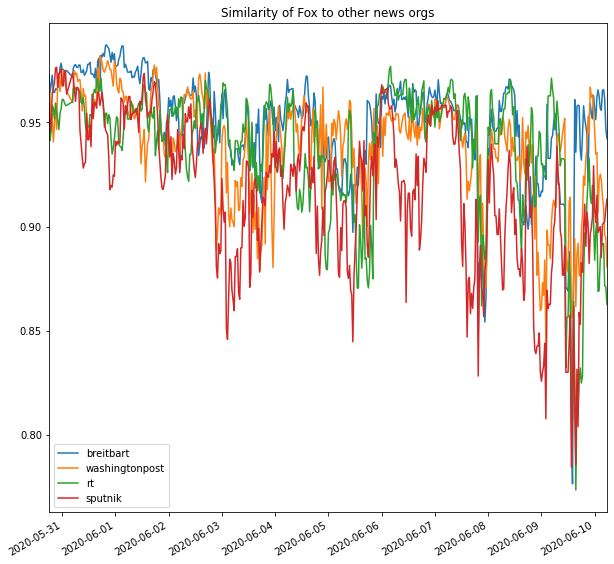

In [ ]:
similarityOverTime = describer.w2vSimilarityOverTime("foxnews", exogenous=["breitbart", "washingtonpost", "rt", "sputnik"], scope=500, keywords=["floyd", "protest", "riot", "police"])
fig, ax=plt.subplots(figsize=(10,10), facecolor="w")
similarityOverTime.T.plot(title="Similarity of Fox to other news orgs", ax=ax)
plt.show()


and we can do the same for RT and Sputnik

## plotting the 2 hr rolling average cosine similarity for a couple to get a sense of what we're looking at 

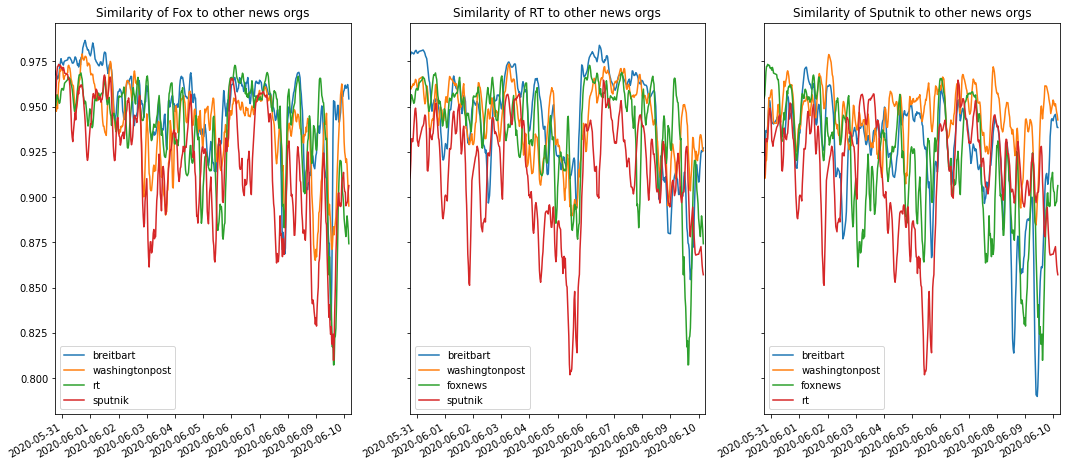

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=3, figsize=(18,8), sharey=True, facecolor="w")


similarityOverTime = describer.w2vSimilarityOverTime("foxnews", exogenous=["breitbart", "washingtonpost", "rt", "sputnik"], scope=500, keywords=["floyd", "protest", "riot", "police"])
similarityOverTime.T.rolling(window=4).mean().plot(title="Similarity of Fox to other news orgs", ax=axs[0])


similarityOverTime = describer.w2vSimilarityOverTime("rt", exogenous=["breitbart", "washingtonpost", "foxnews", "sputnik"], scope=500, keywords=["floyd", "protest", "riot", "police"])
similarityOverTime.T.rolling(window=4).mean().plot(title="Similarity of RT to other news orgs", ax=axs[1])

similarityOverTime = describer.w2vSimilarityOverTime("sputnik", exogenous=["breitbart", "washingtonpost", "foxnews", "rt"], scope=500, keywords=["floyd", "protest", "riot", "police"])
similarityOverTime.T.rolling(window=4).mean().plot(title="Similarity of Sputnik to other news orgs", ax=axs[2])

plt.show()


## Likewise, we can look at the lagging similarities for all of these.
For the lagging similarities, we're looking at the average similarity to the target publication over the last n timesteps. For instance, here I'll look at the last 120 hours (5 days, 240 timesteps) and see how coverage at time T is similar to T-n timesteps for n in range(1,maxlag=480).

I don't really know how long this takes! I'm replicating a bit of work, there should be a way to save the vectors to compare later for each of the calls. This takes a few minutes on an old macbook. I should have used timeit in hindsight. That being said, it's still a bit slow and I dont know why that is =/

fox done
rt done


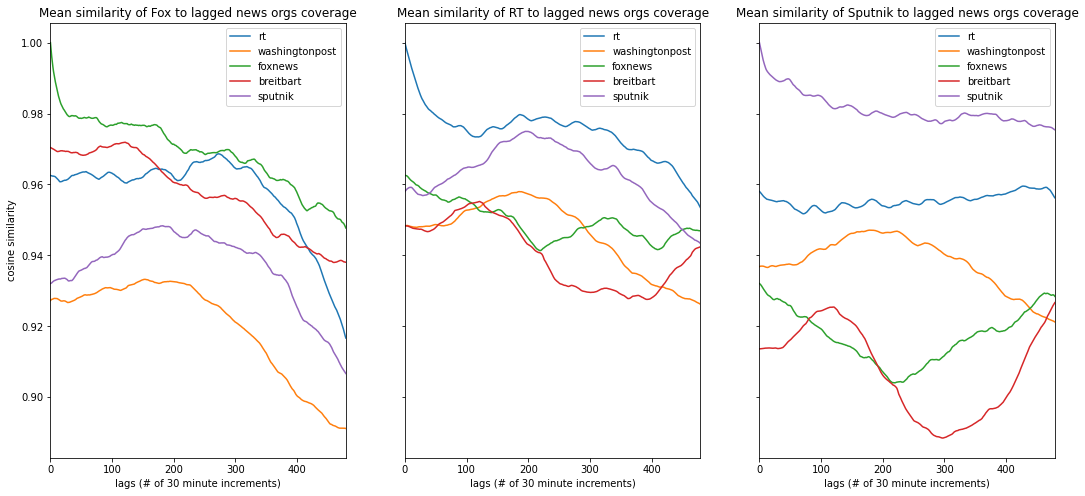

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=3, figsize=(18,8), sharey=True, facecolor="w")

lags = describer.meanw2vSimilarityOverTime("foxnews", ["rt", "washingtonpost", "foxnews", "breitbart", "sputnik"], maxLag=480, timeFrame=240)
lags.plot(title="Mean similarity of Fox to lagged news orgs coverage", ax=axs[0])
axs[0].set_ylabel("cosine similarity")
axs[0].set_xlabel("lags (# of 30 minute increments)")
print("fox done") #this shouldn't take that long but since doing 3 I guess it takes a minute

lags = describer.meanw2vSimilarityOverTime("rt", ["rt", "washingtonpost", "foxnews", "breitbart", "sputnik"], maxLag=480, timeFrame=240)
lags.plot(title="Mean similarity of RT to lagged news orgs coverage", ax=axs[1])
axs[1].set_xlabel("lags (# of 30 minute increments)")
print("rt done")

lags = describer.meanw2vSimilarityOverTime("sputnik", ["rt", "washingtonpost", "foxnews", "breitbart", "sputnik"], maxLag=480, timeFrame=240)
lags.plot(title="Mean similarity of Sputnik to lagged news orgs coverage", ax=axs[2])
axs[2].set_xlabel("lags (# of 30 minute increments)")


plt.show()

# well, so we can see how the similarity in overall topics is changing, but what if we restrict it to sentences covering certain keywords?
in hindsight, topic model to identify interesting keywords might be useful, but instead I'll just pull some random terms I'd guess are related to the current BLM issues. Keywords takes all headlines that contain at least one of those terms, I forget if I'm checking the stem or the acual term though.

fox done
rt done


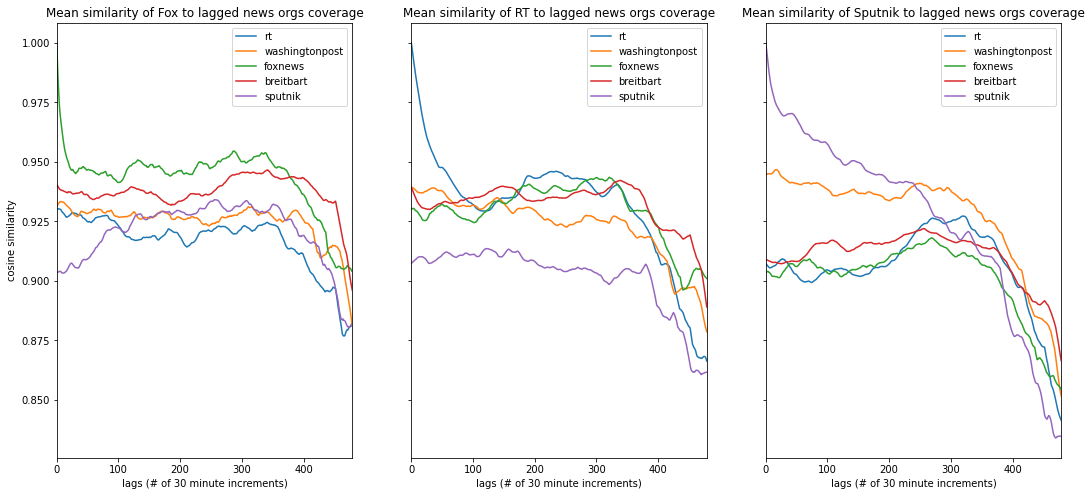

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=3, figsize=(18,8), sharey=True, facecolor="w")

lags = describer.meanw2vSimilarityOverTime("foxnews", ["rt", "washingtonpost", "foxnews", "breitbart", "sputnik"], maxLag=480, timeFrame=240, keywords=["floyd", "protest", "riot", "police"])
lags.plot(title="Mean similarity of Fox to lagged news orgs coverage", ax=axs[0])
axs[0].set_ylabel("cosine similarity")
axs[0].set_xlabel("lags (# of 30 minute increments)")
print("fox done") #this shouldn't take that long but since doing 3 I guess it takes a minute

lags = describer.meanw2vSimilarityOverTime("rt", ["rt", "washingtonpost", "foxnews", "breitbart", "sputnik"], maxLag=480, timeFrame=240, keywords=["floyd", "protest", "riot", "police"])
lags.plot(title="Mean similarity of RT to lagged news orgs coverage", ax=axs[1])
axs[1].set_xlabel("lags (# of 30 minute increments)")
print("rt done")

lags = describer.meanw2vSimilarityOverTime("sputnik", ["rt", "washingtonpost", "foxnews", "breitbart", "sputnik"], maxLag=480, timeFrame=240, keywords=["floyd", "protest", "riot", "police"])
lags.plot(title="Mean similarity of Sputnik to lagged news orgs coverage", ax=axs[2])
axs[2].set_xlabel("lags (# of 30 minute increments)")


plt.show()

# Well, I guess I can just do pairwise for each publisher, that might be interesting

In [ ]:
os.makedirs("ExampleOutputs", exist_ok=True)

publishers = describer.df.source.unique()
similarities = pd.DataFrame()

done = []

for endog in publishers:
    print(endog)
    done.append(endog)
    remaining = [x for x in publishers if x not in done]
    if len(remaining) == 0:
        break
        
    lags = describer.w2vSimilarityOverTime(endog, exogenous=remaining, scope=800)
    lags = lags.T
    
    for exog in lags.columns:
        similarities["{}_{}".format(endog, exog)] = lags[exog]
    similarities.to_pickle("ExampleOutputs/similarities.pkl")
    

yahoonews


/Library/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:902: RuntimeWarning: invalid value encountered in true_divide
  similarities = dot_products / (norm * all_norms)


businessinsider
nbcnews
politico
reuters
abcnews
cnbc
dailybeast
bbc
foxnews
breitbart
cnn
bostonglobe
chicagotribune
nypost
washingtonpost
sanfransiscochronicle
aljazeera
nationalreview
rt
nydailynews
newyorktimes
axios
livescience
forbes
fortune
arstechnica
dailycaller
npr
slate
sputnik
buzzfeed
techcrunch
newyorker
theatlantic


In [ ]:
os.makedirs("ExampleOutputs", exist_ok=True)

publishers = describer.df.source.unique()
similarities = pd.DataFrame()

done = []

for endog in publishers:
    print(endog)
    remaining = [x for x in publishers if x not in done]
    if len(remaining) == 0:
        break
        
    lags = describer.meanw2vSimilarityOverTime(endog, remaining, maxLag=480, timeFrame=240)
    lags = lags.T
    
    for exog in lags.columns:
        similarities["{}_{}".format(endog, exog)] = lags[exog]
        
    done.append(endog)
    similarities.to_pickle("ExampleOutputs/lags.pkl")
    

yahoonews
businessinsider
nbcnews
politico
reuters
abcnews
cnbc
dailybeast
bbc
foxnews
breitbart
cnn
bostonglobe
chicagotribune
nypost
washingtonpost
sanfransiscochronicle
aljazeera
nationalreview
rt
nydailynews
newyorktimes
axios
livescience
forbes
fortune
arstechnica
dailycaller
npr
slate
sputnik
buzzfeed
techcrunch
newyorker
theatlantic


In [ ]:
os.listdir("ExampleOutputs")

['similarities.pkl', 'lags.pkl']

In [ ]:
sims = pd.read_pickle("ExampleOutputs/similarities.pkl")

In [ ]:
sims.head()

,yahoonews_businessinsider,yahoonews_nbcnews,yahoonews_politico,yahoonews_reuters,yahoonews_abcnews,yahoonews_cnbc,yahoonews_bbc,yahoonews_foxnews,yahoonews_breitbart,yahoonews_cnn,...,sputnik_buzzfeed,sputnik_techcrunch,sputnik_newyorker,sputnik_theatlantic,buzzfeed_techcrunch,buzzfeed_newyorker,buzzfeed_theatlantic,techcrunch_newyorker,techcrunch_theatlantic,newyorker_theatlantic
2020-06-10 05:30:00,0.798269,0.894978,0.920000,0.800252,0.962490,0.710778,0.875214,0.955855,0.972371,0.896129,...,0.737000,0.814136,0.882677,0.800096,0.836103,0.894146,0.879867,0.826426,0.706536,0.899559
2020-06-10 05:00:00,0.793882,0.911158,0.922280,0.777107,0.961435,0.722974,0.891973,0.964775,0.969603,0.915943,...,0.733501,0.813668,0.879866,0.794878,0.836923,0.895226,0.879845,0.826426,0.706536,0.899559
2020-06-10 04:30:00,0.811890,0.920067,0.893561,0.789846,0.970358,0.732689,0.933485,0.958837,0.954116,0.915263,...,0.727672,0.837946,0.875695,0.788730,0.819158,0.895290,0.880510,0.827886,0.697802,0.899559
2020-06-10 04:00:00,0.810132,0.918628,0.902335,0.855540,0.953524,0.743942,0.924411,0.943131,0.946777,0.894927,...,0.724617,0.834904,0.876150,0.790032,0.818479,0.896852,0.880181,0.826817,0.697802,0.905155
2020-06-10 03:30:00,0.852459,0.905054,0.932112,0.885991,0.962592,0.775992,0.895125,0.951908,0.961601,0.912944,...,0.737479,0.840267,0.883885,0.794090,0.833057,0.897999,0.880698,0.834735,0.709611,0.905155
